# step-1. Bussiness problem understanding

- Previously, we explore is there a relationship between total advertising spend and sales? as well as predicting the total sales for somevalue of total spend
- **what is th erelationship b/n each advertising channel (tv,radio, newspaper) and sales?**

# step-2.DAta Understanding 

**load data& understanding evry variable**


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [107]:
# Data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [109]:
# exploratory data undestanding
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


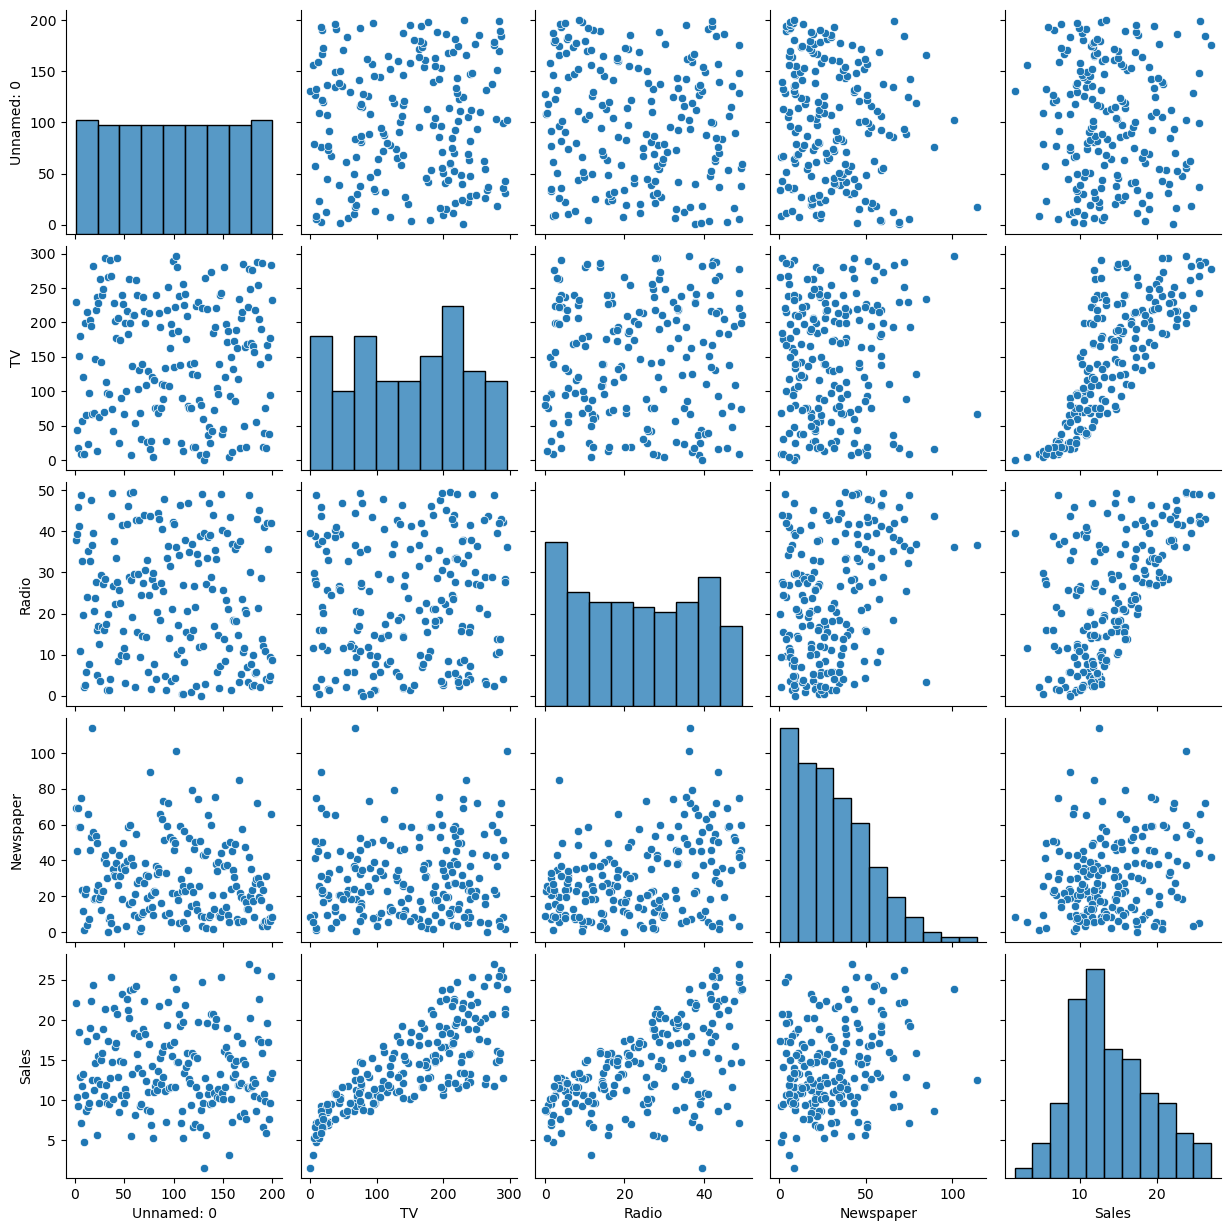

In [111]:
sns.pairplot(df)
plt.show()

In [112]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


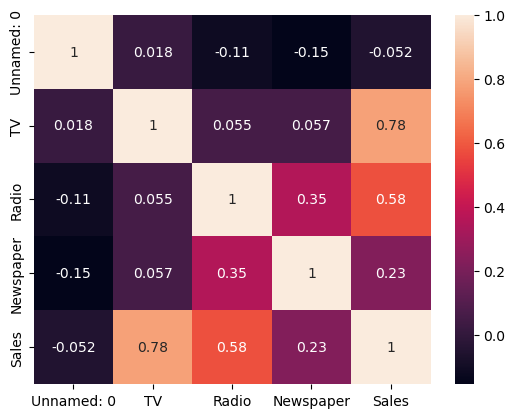

In [113]:
sns.heatmap(df.corr(),annot=True)
plt.show()

- The relation b/n output variable and input variable should be high
- the higher the value the stronger the correlation, better accuracy
- if it has less correlation,it is a problem...less accuuracy
- if any input variable has correlation less than 0.2 with output variable, then that input variable should be dropped
- the relation b/n any two independentvariables shold be low
- if the correlation b/n any 2 independent variableis>=0.5
-
- , then it is called colonearity problem
- solution:drop1 out of 2

In [22]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [24]:
df[["TV","Radio","Newspaper"]].skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
dtype: float64

# Step-3.Data Preprocessing

- Data Preprocessing

In [28]:
# for this dataset , no data cleaning required

In [ ]:
#Data wrangling
#for this dataset, no encoding required


X&y

In [48]:
X=df.drop(columns=["Sales"])
y=df["Sales"]

**to identify the best random state number**

In [164]:
Train=[]
CV=[]

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    ypred_train=model.predict(X_train)
    
    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train,y_train,cv=5).mean())

em=pd.DataFrame({"Train":Train,"CV":CV})
gm = em[(abs(em['Train']-em['CV'])<=0.05)]
rs= gm[gm["CV"]==gm["CV"].max()].index.tolist()[0]
print("best random state number:",rs)

best random state number: 10


### Train test split

In [119]:

    from sklearn.model_selection import train_test_split
    X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
  
    

# modelling

- 3 i/p columns

In [121]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

print("Intercept:",model.intercept_)
print("coefficient:",model.coef_)

Intercept: 3.351910530580973
coefficient: [-0.00083451  0.04375495  0.19331376 -0.00247807]


# evaluation

In [123]:
# preedicted on train data
ypred_train=model.predict(X_train)

# evaluation on test data
from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_train,ypred_train))

Test R2: 0.9210064755430887


In [128]:
from sklearn.model_selection import cross_val_score
print("cross validation score:",cross_val_score(model,X_train,y_train,cv=5).mean())

cross validation score: 0.9156141274090792


In [130]:
# preedicted on train data
ypred_test=model.predict(X_test)

# evaluation on test data
from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Test R2: 0.8350889287403332


# Step-6.Model Selection

- condition1: train==cv(satisfied)
- condition2: train==(not satisfied)
- condition3:bussiness problem(not satisfied)
- condition4 : only for linear regression---->assumption must be satisfied

check for Assumption

1.Linearity error

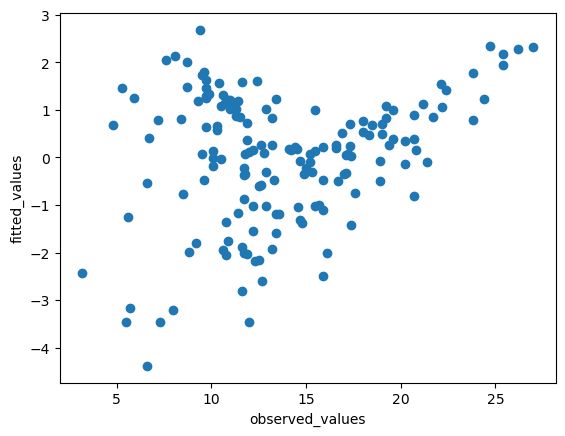

In [134]:
train_error=y_train - ypred_train

plt.scatter(y_train,train_error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

In [137]:
# 2.normality of error
train_error.skew()

-0.6901963531756232

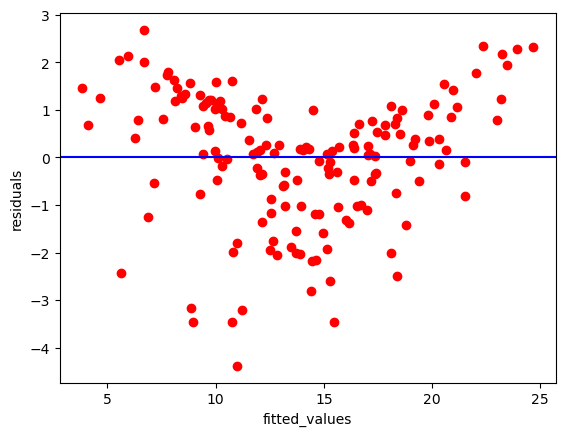

In [160]:
# 3.Equal variance of error(homoscadecity)

plt.scatter(ypred_train,train_error,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

4.independent of error(variable significance)

hypothesis testing for variable

- null hypothesis: there is no relationship between input variable and ouput(and thus B1 equal zero)
- alternatve hypothesis: there i a relationship between input variable and output variable(and thus B1 is not equal to zero)

# error prplem but below solve

from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=10)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~X_train",data=df_train).fit()
model1.summary()

In [180]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8, random_state=10)

import statsmodels.formula.api as smf

# Let's say you want to predict 'Sales' using TV, Radio, Newspaper
model1 = smf.ols('Sales ~ TV + Radio + Newspaper', data=df_train).fit()

print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Mon, 19 May 2025   Prob (F-statistic):           1.09e-85
Time:                        11:44:58   Log-Likelihood:                -276.62
No. Observations:                 160   AIC:                             561.2
Df Residuals:                     156   BIC:                             573.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2541      0.286     11.364      0.0

- in above case, newspaper variable is not sognificiant(not important)
- reason:p>0.05
- meaning:regression is not fitted, instead of regression average model is best

In [184]:
x = df[["TV","Radio"]]

y = df["Sales"]

let try by dropping the influential records

- 198 records with 3 columns

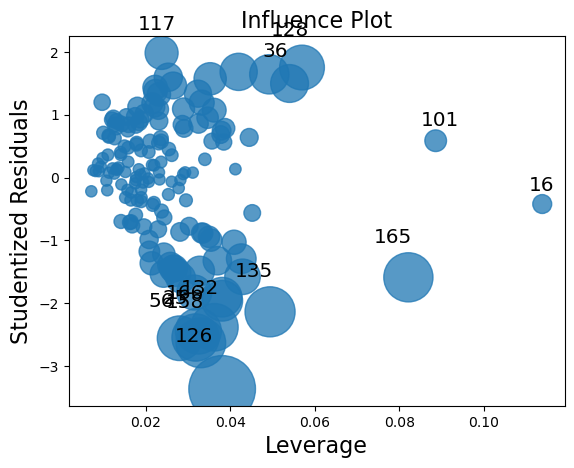

In [190]:
import statsmodels.api as sm

sm.graphics.influence_plot(model1)
plt.show()

# final model including tv and radio only

In [237]:
# # drop the influential records
# df.drop(index=[101,16,165],inplace=True,errors='ignore')



# X=df.drop(columns=["Sales"])
# y=df["Sales"]

# from sklearn.model_selection import train_test_split
# df_train, df_test = train_test_split(df, train_size=0.8, random_state=10)

# from sklearn.linear_model import LinearRegression
# model3=LinearRegression()
# model3.fit(X_train,y_train)

# print("Intercept:",model3.intercept_)
# print("coefficient:",model3.coef_)

# ypred_train=model3.predict(X_train)
# print("Train R2:",r2_score(y_train,ypred_train))
# print("cross validation score:",cross_val_score(model,X_train,y_train,cv=5).mean())

# ypred_test=model3.predict(X_train)
# print("Train R2:",r2_score(y_test,ypred_test))

In [210]:
# 1. Drop influential points
df.drop(index=[101, 16, 165], inplace=True, errors='ignore')

# 2. Define X and y
X = df.drop(columns=["Sales"])
y = df["Sales"]

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

# 4. Model
model3 = LinearRegression()
model3.fit(X_train, y_train)

# 5. Coefficients
print("Intercept:", model3.intercept_)
print("Coefficients:", model3.coef_)

# 6. Training R²
ypred_train = model3.predict(X_train)
print("Train R2:", r2_score(y_train, ypred_train))

# 7. Cross Validation Score
print("Cross-validation score:", cross_val_score(model3, X_train, y_train, cv=5).mean())

# 8. Test R²
ypred_test = model3.predict(X_test)
print("Test R2:", r2_score(y_test, ypred_test))

Intercept: 3.0604337564591404
Coefficients: [-0.00031526  0.04413429  0.19486672  0.00420494]
Train R2: 0.925249684808322
Cross-validation score: 0.9097923193081694
Test R2: 0.7804968916323148


# Variance inlation factor(vif)

- how much ,1 independent variable impacts other independent variable
- vif measures the radio between the variance for a given regression coefficient with only that variable in the model versus the variance for a given regression coefficient with all variable in the model.

In [224]:
rsq_TV = smf.ols('TV~Radio+Newspaper',data=df).fit().rsquared
rsq_TV.summary()
# vif_TV = 1/(1-rsq_TV)
# vif_TV

AttributeError: 'numpy.float64' object has no attribute 'summary'

In [222]:
model = smf.ols('TV ~ Radio + Newspaper', data=df).fit()
print(model.summary())  # for detailed regression output

rsq_TV = model.rsquared
print("R-squared:", rsq_TV)

# Calculate VIF
vif_TV = 1 / (1 - rsq_TV)
print("VIF for TV:", vif_TV)


                            OLS Regression Results                            
Dep. Variable:                     TV   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3662
Date:                Mon, 19 May 2025   Prob (F-statistic):              0.694
Time:                        12:59:11   Log-Likelihood:                -1154.9
No. Observations:                 197   AIC:                             2316.
Df Residuals:                     194   BIC:                             2326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    137.0494     12.770     10.732      0.0

In [230]:
import statsmodels.formula.api as smf
import pandas as pd

# Step 1: Calculate R² and VIF for each independent variable

# VIF for TV
rsq_TV = smf.ols('TV ~ Radio + Newspaper', data=df).fit().rsquared
vif_TV = 1 / (1 - rsq_TV)

# VIF for radio
rsq_Radio = smf.ols('Radio ~ TV + Newspaper', data=df).fit().rsquared
vif_Radio = 1 / (1 - rsq_Radio)

# VIF for newspaper
rsq_Newspaper = smf.ols('Newspaper ~ radio + TV', data=df).fit().rsquared
vif_Newspaper = 1 / (1 - rsq_Newspaper)

# Step 2: Store all VIFs in a DataFrame
d1 = {
    'Variables': ['TV', 'Radio', 'Newspaper'],
    'VIF': [vif_TV, vif_Radio, vif_Newspaper]
}
Vif_frame = pd.DataFrame(d1)

# Step 3: Show VIF values
print(Vif_frame)


PatsyError: Error evaluating factor: NameError: name 'radio' is not defined
    Newspaper ~ radio + TV
                ^^^^^

In [232]:
import statsmodels.formula.api as smf
import pandas as pd

# Step 1: Calculate R² and VIF for each independent variable

# VIF for TV
rsq_TV = smf.ols('TV ~ Radio + Newspaper', data=df).fit().rsquared
vif_TV = 1 / (1 - rsq_TV)

# VIF for Radio
rsq_Radio = smf.ols('Radio ~ TV + Newspaper', data=df).fit().rsquared
vif_Radio = 1 / (1 - rsq_Radio)

# VIF for Newspaper
rsq_Newspaper = smf.ols('Newspaper ~ Radio + TV', data=df).fit().rsquared
vif_Newspaper = 1 / (1 - rsq_Newspaper)

# Step 2: Store all VIFs in a DataFrame
d1 = {
    'Variables': ['TV', 'Radio', 'Newspaper'],
    'VIF': [vif_TV, vif_Radio, vif_Newspaper]
}
Vif_frame = pd.DataFrame(d1)

# Step 3: Show VIF values
print(Vif_frame)


   Variables       VIF
0         TV  1.003776
1      Radio  1.164655
2  Newspaper  1.162093


VIF > 4 → threshold value= 4 then there exist a problem and reinvestment the problem

VIF > 4 → ,for any independent variable then drop that particular variable